# Pyam Integration

*Note: This notebook will eventually show how OpenSCM integrates with Pyam. For now it's just a very basic sketch of how the integration will work.

Here we make use of the direct connection to the IIASA database made available in Pyam.

In [0]:
# NBVAL_IGNORE_OUTPUT
import pyam
import seaborn as sns

from openscm.scmdataframe import ScmDataFrame  # uncomment when implemented

<IPython.core.display.Javascript object>

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
Not importing directory /home/zebedee/Documents/AGCEC/MCastle/openscm/venv/lib/python3.7/site-packages/sphinxcontrib: missing __init__
Not importing directory /home/zebedee/Documents/AGCEC/MCastle/openscm/venv/lib/python3.7/site-packages/mpl_toolkits: missing __init__


In [0]:
sns.set(style="darkgrid")

In [0]:
df = ScmDataFrame(pyam.read_iiasa_iamc15(
    model="MESSAGEix*", 
    variable=["Emissions*"], 
))

INFO:root:You are connected to the iamc15 scenario explorer. Please cite as:

D. Huppmann, E. Kriegler, V. Krey, K. Riahi, J. Rogelj, S.K. Rose, J. Weyant, et al., IAMC 1.5C Scenario Explorer and Data hosted by IIASA. IIASA & IAMC, 2018. doi: 10.22022/SR15/08-2018.15429, url: data.ene.iiasa.ac.at/iamc-1.5c-explorer


In [0]:
type(df)

openscm.scmdataframe.ScmDataFrame

In [0]:
# NBVAL_IGNORE_OUTPUT
df["variable"].unique()

array(['Emissions|BC', 'Emissions|CH4', 'Emissions|CH4|AFOLU',
       'Emissions|CH4|Energy', 'Emissions|CO2', 'Emissions|CO2|AFOLU',
       'Emissions|CO2|Energy',
       'Emissions|CO2|Energy and Industrial Processes',
       'Emissions|CO2|Energy|Demand',
       'Emissions|CO2|Energy|Demand|Industry',
       'Emissions|CO2|Energy|Demand|Residential and Commercial',
       'Emissions|CO2|Energy|Supply',
       'Emissions|CO2|Energy|Supply|Electricity', 'Emissions|F-Gases',
       'Emissions|Kyoto Gases', 'Emissions|N2O', 'Emissions|N2O|AFOLU',
       'Emissions|N2O|Energy', 'Emissions|Sulfur',
       'Emissions|Kyoto Gases (AR4-GWP100)',
       'Emissions|Kyoto Gases (AR5-GWP100)',
       'Emissions|Kyoto Gases (SAR-GWP100)', 'Emissions|CO',
       'Emissions|HFC', 'Emissions|NH3', 'Emissions|NOx', 'Emissions|OC',
       'Emissions|PFC', 'Emissions|SF6', 'Emissions|VOC'], dtype=object)

In [0]:
df["region"].unique()

array(['R5ASIA', 'R5LAM', 'R5MAF', 'R5OECD90+EU', 'R5REF', 'World'],
      dtype=object)

In [0]:
df["scenario"].unique()

array(['CD-LINKS_INDCi', 'CD-LINKS_NPi', 'CD-LINKS_NPi2020_1000',
       'CD-LINKS_NPi2020_1600', 'CD-LINKS_NPi2020_400',
       'CD-LINKS_NoPolicy', 'LowEnergyDemand'], dtype=object)

In [0]:
# NBVAL_IGNORE_OUTPUT
df.timeseries().head()

time                                                                        2000-01-01 00:00:00  \
model                 scenario       region variable             unit                             
MESSAGEix-GLOBIOM 1.0 CD-LINKS_INDCi R5ASIA Emissions|BC         Mt BC/yr              2.530980   
                                            Emissions|CH4        Mt CH4/yr           120.550168   
                                            Emissions|CH4|AFOLU  Mt CH4/yr            60.433353   
                                            Emissions|CH4|Energy Mt CH4/yr            26.609356   
                                            Emissions|CO2        Mt CO2/yr          7377.558436   

time                                                                        2005-01-01 00:00:00  \
model                 scenario       region variable             unit                             
MESSAGEix-GLOBIOM 1.0 CD-LINKS_INDCi R5ASIA Emissions|BC         Mt BC/yr              2.770729   
                                            Emissions|CH4        Mt CH4/yr           138.688823   
                                            Emissions|CH4|AFOLU  Mt CH4/yr            62.045004   
                                            Emissions|CH4|Energy Mt CH4/yr            38.052038   
                                            Emissions|CO2        Mt CO2/yr         10246.819510   

time                                                                        2010-01-01 00:00:00  \
model                 scenario       region variable             unit                             
MESSAGEix-GLOBIOM 1.0 CD-LINKS_INDCi R5ASIA Emissions|BC         Mt BC/yr              2.986790   
                                            Emissions|CH4        Mt CH4/yr           139.069717   
                                            Emissions|CH4|AFOLU  Mt CH4/yr            63.621226   
                                            Emissions|CH4|Energy Mt CH4/yr            45.776787   
                                            Emissions|CO2        Mt CO2/yr         13264.606330   

time                                                                        2015-01-01 00:00:00  \
model                 scenario       region variable             unit                             
MESSAGEix-GLOBIOM 1.0 CD-LINKS_INDCi R5ASIA Emissions|BC         Mt BC/yr                   NaN   
                                            Emissions|CH4        Mt CH4/yr                  NaN   
                                            Emissions|CH4|AFOLU  Mt CH4/yr                  NaN   
                                            Emissions|CH4|Energy Mt CH4/yr                  NaN   
                                            Emissions|CO2        Mt CO2/yr                  NaN   

time                                                                        2020-01-01 00:00:00  \
model                 scenario       region variable             unit                             
MESSAGEix-GLOBIOM 1.0 CD-LINKS_INDCi R5ASIA Emissions|BC         Mt BC/yr              2.286943   
                                            Emissions|CH4        Mt CH4/yr           142.675844   
                                            Emissions|CH4|AFOLU  Mt CH4/yr            67.724121   
                                            Emissions|CH4|Energy Mt CH4/yr            41.268162   
                                            Emissions|CO2        Mt CO2/yr         14548.094980   

time                                                                        2030-01-01 00:00:00  \
model                 scenario       region variable             unit                             
MESSAGEix-GLOBIOM 1.0 CD-LINKS_INDCi R5ASIA Emissions|BC         Mt BC/yr              2.160023   
                                            Emissions|CH4        Mt CH4/yr           147.232872   
                                            Emissions|CH4|AFOLU  Mt CH4/yr            69.782370   
                                   

Pyam's plotting functions provide great defaults for making all sorts of informative plots.

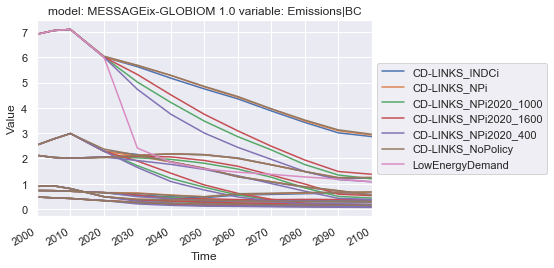

In [0]:
df.filter(variable='Emissions|BC').line_plot(
    color='scenario', 
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
);

The use of a `pd.DataFrame` underneath the hood makes integration with other tools, like seaborn, trivial.

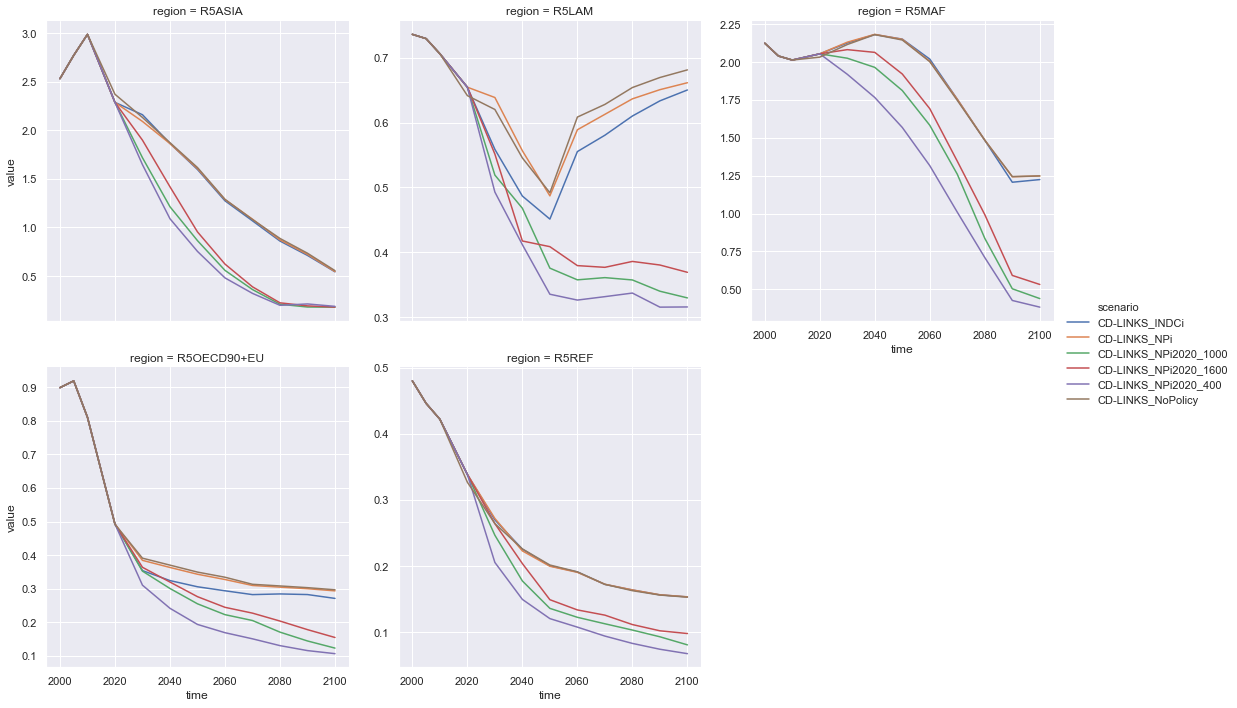

In [0]:
emissions_bc = df.filter(
    variable="Emissions|BC"
).filter(
    region="World",
    keep=False
).to_iamdataframe().data
sns.relplot(
    x="time",
    y="value",
    kind="line",
    col="region",
    col_wrap=3,
    hue="scenario",
    data=emissions_bc,
    ci=None,
    facet_kws={"sharey": False},
);